In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import ttest_ind

warnings.filterwarnings('ignore')


In [2]:
con=sqlite3.connect('inventory.db')
df=pd.read_sql_query('select * from vendor_sales_summary',con)
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,volume,totalPurchaseQuantity,totalPurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexciseTax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


 EDA in final table

In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
totalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


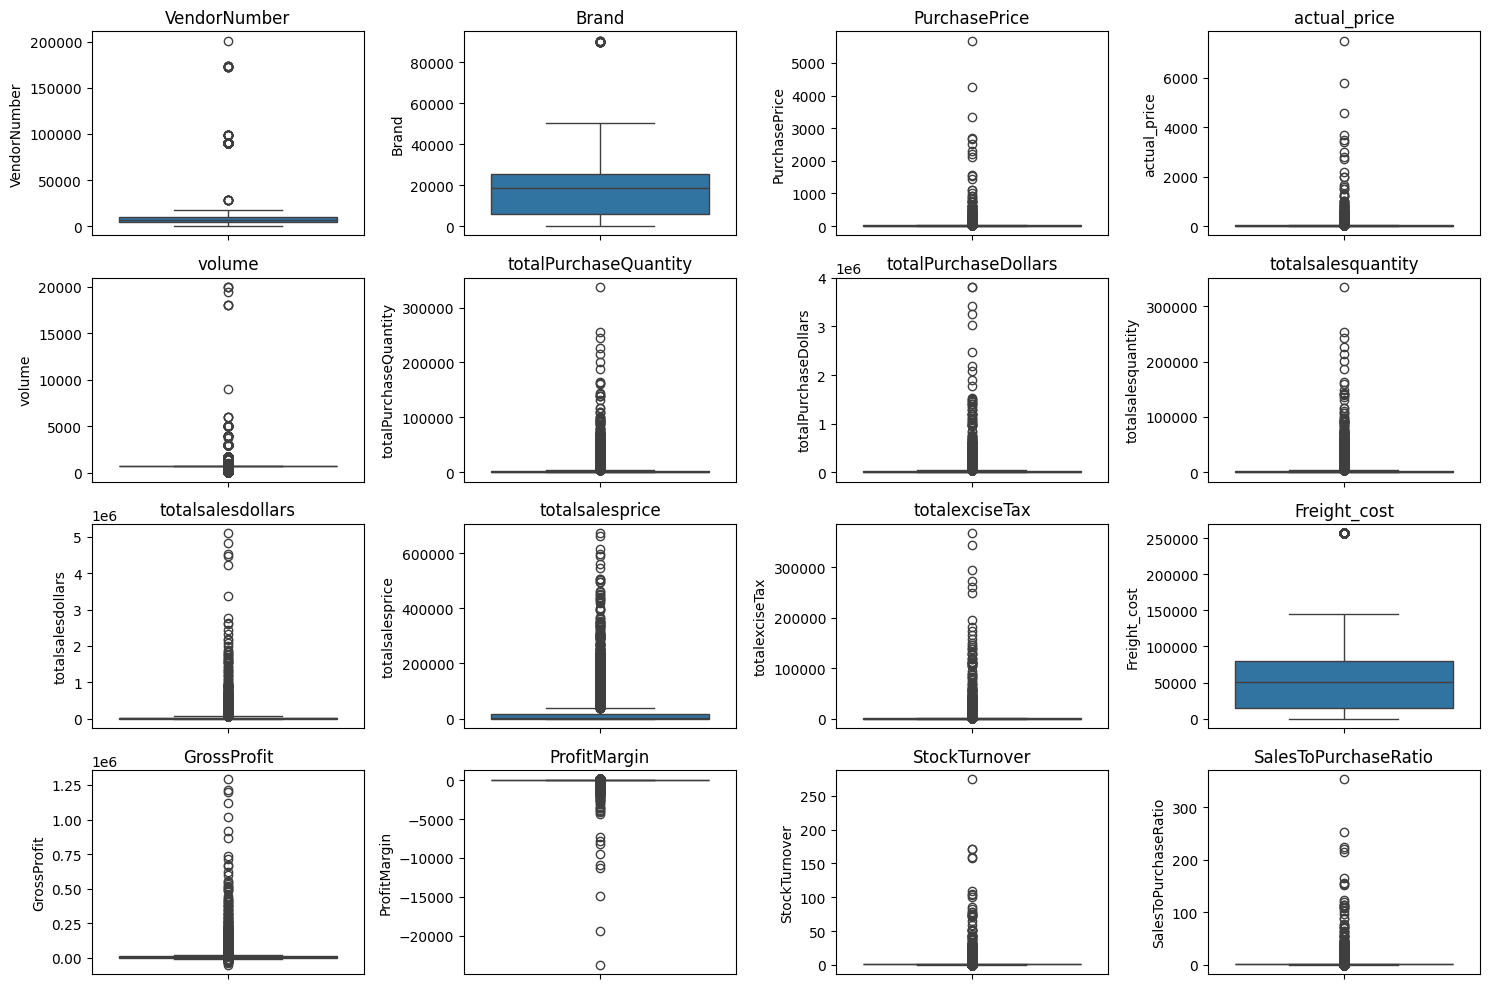

In [4]:
# distribution plots for numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns
# outlier detection using boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [94]:
# filter the data in table vendor sales summary
df=pd.read_sql_query(""" select * from vendor_sales_summary
where GrossProfit>0
and ProfitMargin>0
and totalsalesquantity>0 """,con)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,volume,totalPurchaseQuantity,totalPurchaseDollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexciseTax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [95]:
df['ProfitMargin'].mean()

np.float64(38.72298710928555)

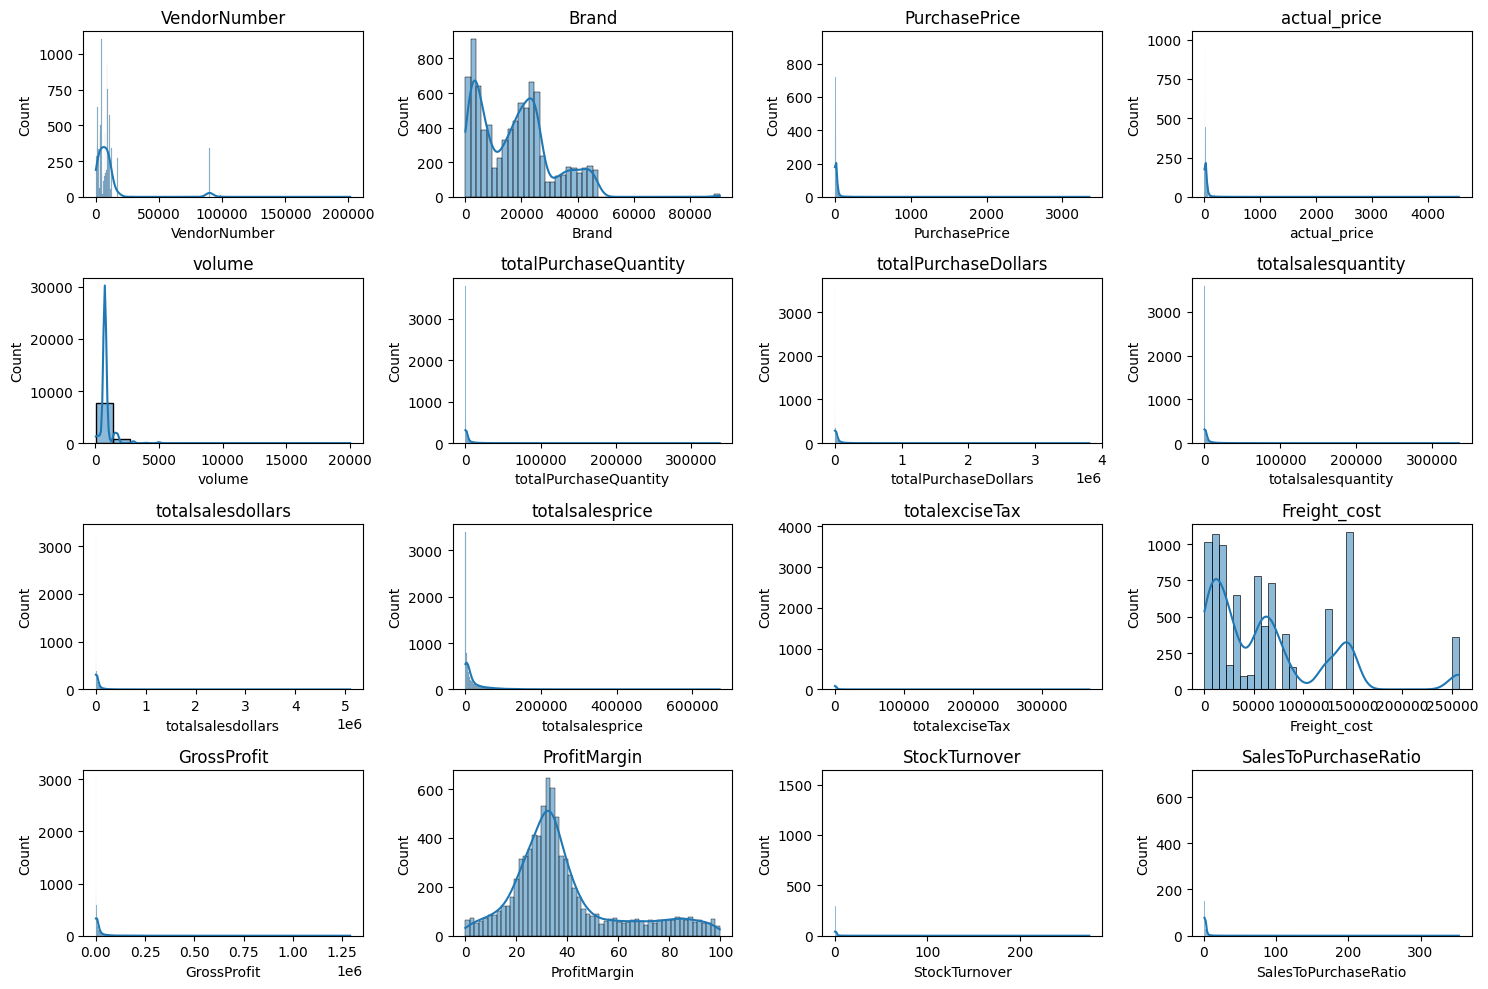

In [6]:

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)   
    sns.histplot(x=df[col], kde=True) 
    plt.title(col)
plt.tight_layout()
plt.show()


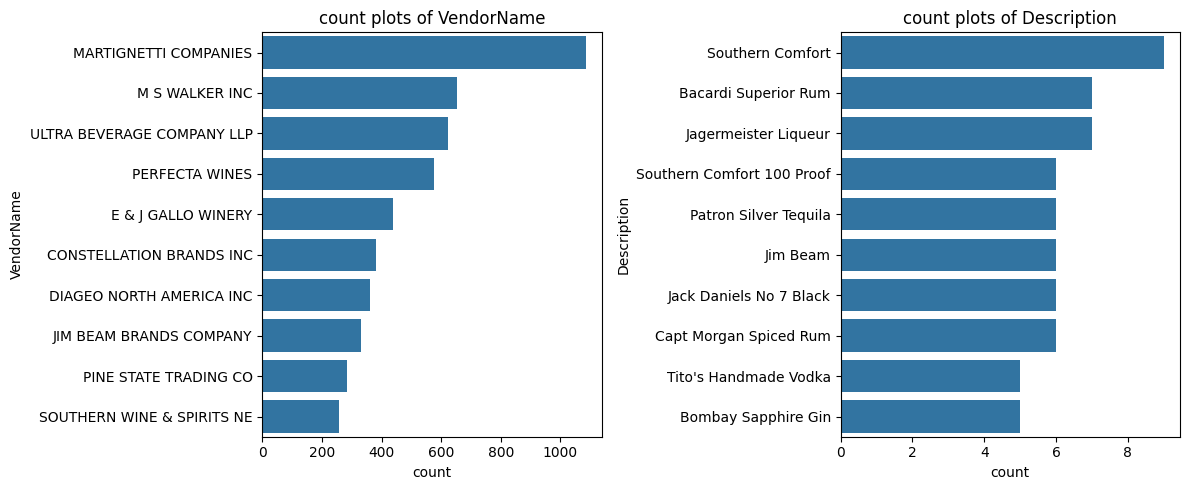

In [17]:
# count plots for catagoricl columns top 10 most Vandors
catagorical_cols=["VendorName","Description"]
plt.figure(figsize=(12,5))
for i,col in enumerate(catagorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plots of {col}")
plt.tight_layout()
plt.show()

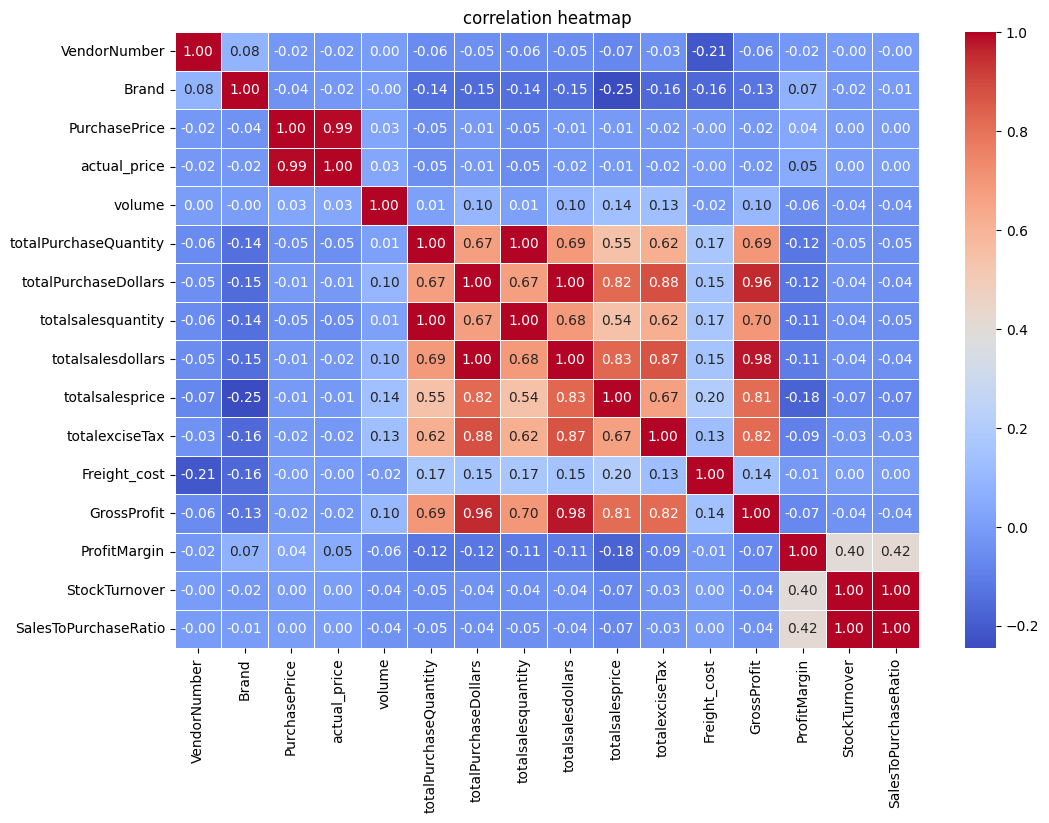

In [9]:
# correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("correlation heatmap")
plt.show()

DATA ANALYSIS
identity brand that need promotion or pricing adjustment which exhibit lower sales performance but higher profit margin

In [10]:
brand_performance=df.groupby('Description').agg({
    'totalsalesdollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,totalsalesdollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [11]:
low_sales_threshold=brand_performance['totalsalesdollars'].quantile(0.15)
highest_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [12]:
low_sales_threshold

np.float64(560.299)

In [13]:
highest_margin_threshold

np.float64(64.97017552750113)

In [14]:
# filter brnad with low sales but high profit margin
target_brands=brand_performance[
    (brand_performance['totalsalesdollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin']>= highest_margin_threshold)
    ]
print("Brand with low sales but high profit margin")
display(target_brands.sort_values('totalsalesdollars'))

Brand with low sales but high profit margin


,Description,totalsalesdollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


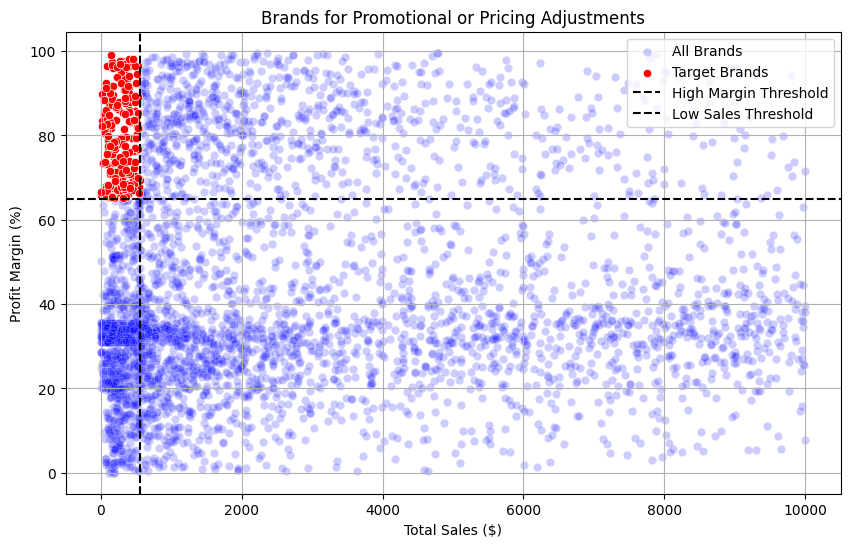

In [15]:
brand_performance = brand_performance[brand_performance['totalsalesdollars'] < 10000]  # for better visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='totalsalesdollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='totalsalesdollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(highest_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# create a function  for convert sales vlaue million and thousand
def format_dollars(value):
    if value>=1000000:
        return f"{value/1000000:.2f}M"
    elif value>=1000:
        return f"{value/1000:.2f}K"
    else:
        return str(value)

In [17]:
# top vendors and brands by sales performance
top_vendors=df.groupby("VendorName")['totalsalesdollars'].sum().nlargest(10)
top_brands=df.groupby("Description")['totalsalesdollars'].sum().nlargest(10)


In [18]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totalsalesdollars, dtype: float64

In [19]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64

In [20]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

In [21]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: totalsalesdollars, dtype: object

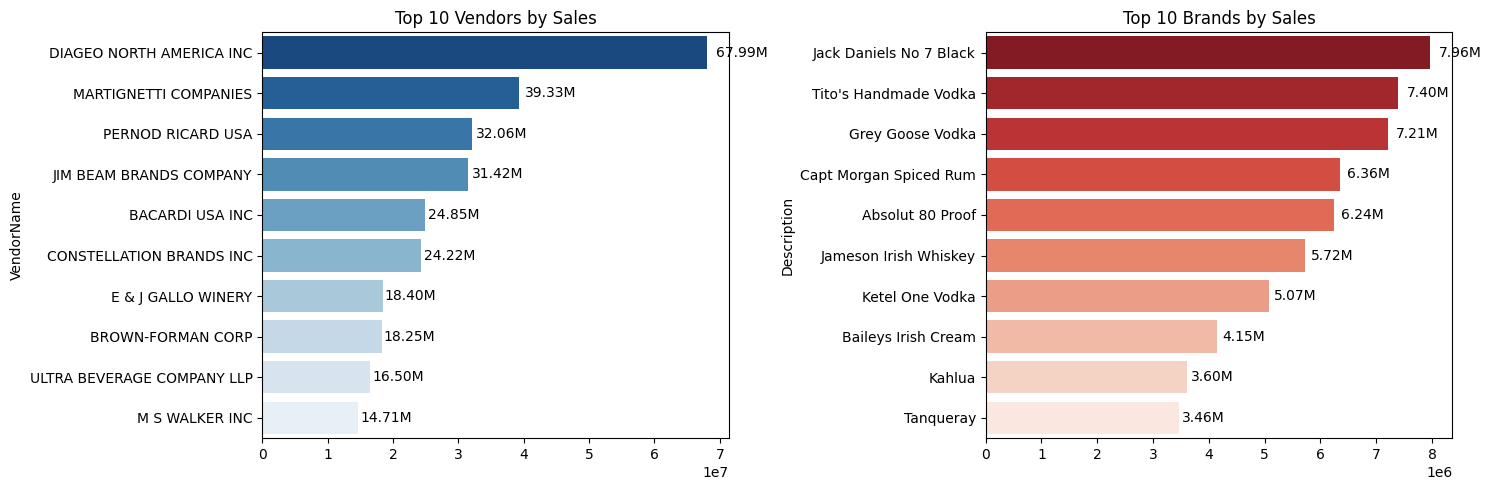

In [22]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Which vendors contribution most to total purchase dollars

In [23]:
vendor_performance=df.groupby ('VendorName').agg({
    'totalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'totalsalesdollars':'sum'
})
vendor_performance['PurchaseContribution%']=vendor_performance['totalPurchaseDollars']/vendor_performance['totalPurchaseDollars'].sum()
vendor_performance

,totalPurchaseDollars,GrossProfit,totalsalesdollars,PurchaseContribution%
VendorName,,,,
ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001
ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084
ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038
AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003
AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340
...,...,...,...,...
WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139
WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971
WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121


In [53]:
vendor_performance['PurchaseContribution%']=vendor_performance['totalPurchaseDollars']/vendor_performance['totalPurchaseDollars'].sum()*100

In [55]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending = False),2)

In [56]:
# display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['totalsalesdollars']=top_vendors['totalsalesdollars'].apply(format_dollars)
top_vendors['totalPurchaseDollars']=top_vendors['totalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors


,totalPurchaseDollars,GrossProfit,totalsalesdollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
BACARDI USA INC,17.43M,7.42M,24.85M,5.67
CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63


In [58]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors = top_vendors.reset_index()
top_vendors

,VendorName,totalPurchaseDollars,GrossProfit,totalsalesdollars,PurchaseContribution%,Cumulative_Contribution%
0,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
1,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
2,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
3,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
4,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
5,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
6,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
7,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
8,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
9,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


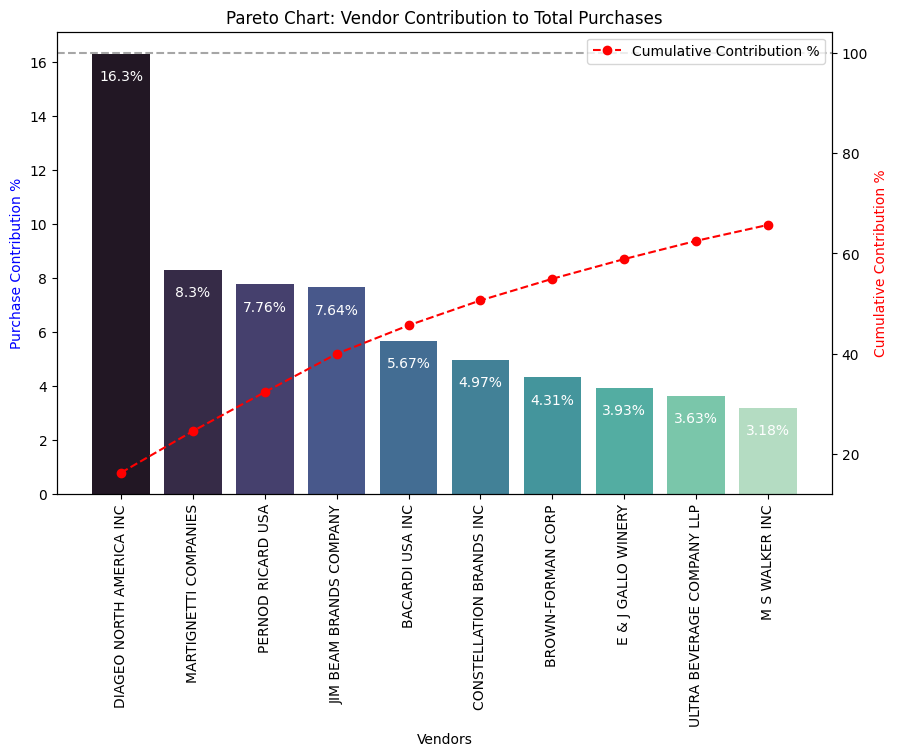

In [64]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], 
            y=top_vendors['PurchaseContribution%'],
            palette="mako", ax=ax1)

# Labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value -1, str(value)+'%',ha='center',fontsize=10,color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],
         top_vendors['Cumulative_Contribution%'], 
         color='red', marker='o', linestyle='dashed', 
         label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7) 
ax2.legend(loc='upper right')

plt.show()


how much of total procurement in dependenton the top vendors

In [66]:
print(f"total purchase countribution of top vendor is {round(top_vendors['PurchaseContribution%'].sum(),2)} % ")

total purchase countribution of top vendor is 65.69 % 


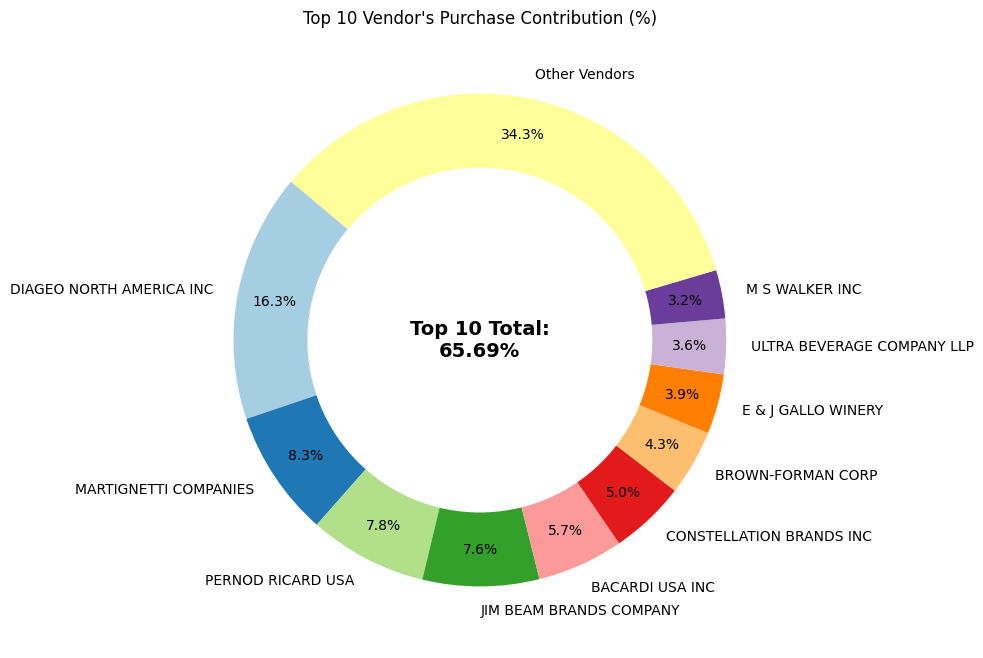

In [68]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", 
         fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cast saving

In [73]:
df['UnitPurchasePrice']=df['totalPurchaseDollars']/df['totalPurchaseQuantity']
df['Ordersize']=pd.qcut(df['totalPurchaseQuantity'],q=3,labels=['small','medium','large'])
df[['Ordersize','totalPurchaseQuantity']]


,Ordersize,totalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8559,small,2
8560,small,6
8561,small,2
8562,small,1


In [74]:
df.groupby('Ordersize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
Ordersize,
small,39.068186
medium,15.486414
large,10.777625


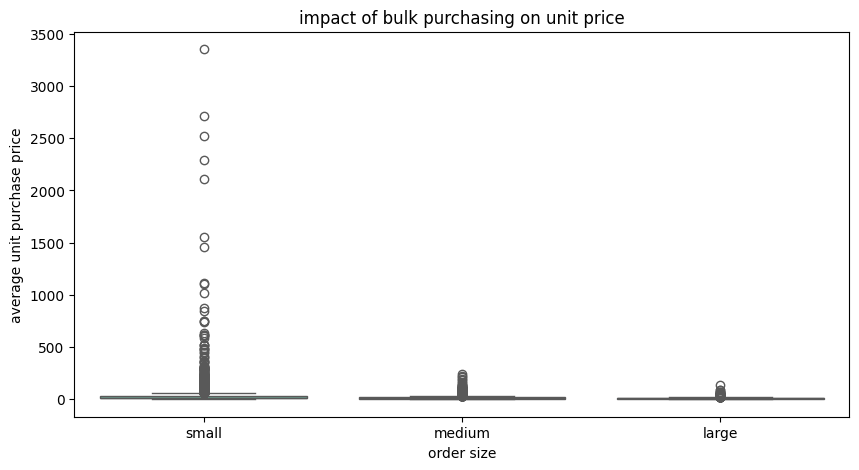

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Ordersize',y='UnitPurchasePrice',palette="Set2")
plt.title("impact of bulk purchasing on unit price")
plt.xlabel("order size")
plt.ylabel("average unit purchase price")
plt.show()

Which vendor have low inventory turnover ,indicating excess stock and slow moving product

In [76]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)


,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


how much capital is locked in unsold inventory per vendor , and which vendor contribute the most to it ?

In [77]:
df["unsoldinventoryvalue"]=(df["totalPurchaseQuantity"] - df["totalsalesquantity"])* df["PurchasePrice"]
print("total unsold capital :" ,format_dollars(df["unsoldinventoryvalue"].sum()))
    

total unsold capital : 2.71M


In [78]:
inventory_value_per_vendor=df.groupby('VendorName')["unsoldinventoryvalue"].sum().reset_index()
# sort Vendor with the highest locked Capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='unsoldinventoryvalue',ascending=False)
inventory_value_per_vendor['unsoldinventoryvalue']=inventory_value_per_vendor['unsoldinventoryvalue'].apply(format_dollars)
inventory_value_per_vendor.head(10)



,VendorName,unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [42]:
top_threshold=df['totalsalesdollars'].quantile(0.75)
low_threshold=df['totalsalesdollars'].quantile(0.25)
top_vendors=df[df['totalsalesdollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['totalsalesdollars']<=low_threshold]['ProfitMargin'].dropna()


In [43]:
top_vendors


0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [45]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [92]:
def confidence_interval(data, confidence=0.95):
    # Agar DataFrame diya ho to pehle numeric columns select karlo
    if isinstance(data, pd.DataFrame):
        data = data.select_dtypes(include=[np.number]).iloc[:, 0]  # pehla numeric column
    
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)

    margin_of_err = t_critical * std_err
    return mean_val, mean_val - margin_of_err, mean_val + margin_of_err


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


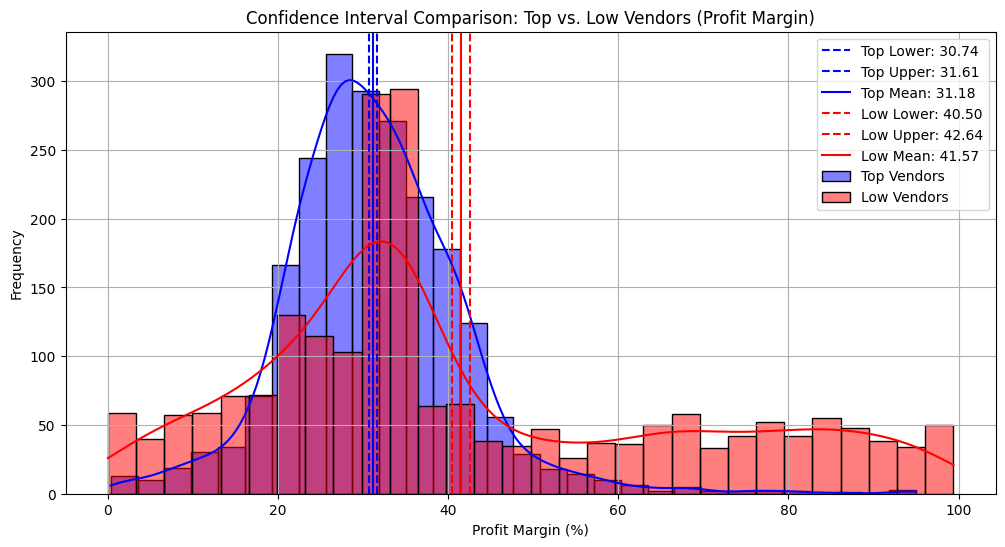

In [93]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.show()


In [91]:
top_threshold=df['totalsalesdollars'].quantile(0.75)
low_threshold=df['totalsalesdollars'].quantile(0.25)
top_vendors=df[df['totalsalesdollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['totalsalesdollars']<=low_threshold]['ProfitMargin'].dropna()
# peerform two - sample T-Test
t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)
# print result
print(f" T-Statistic: {t_stat:.4f},p_value: {p_value:.4f}")
if p_value<0.05:
    print("Reject H: there is a significant difference in profile margins between top and low performing vendors")
else:
    print("Fail to Reject H: no significant difference in profile margins.")

 T-Statistic: -17.6695,p_value: 0.0000
Reject H: there is a significant difference in profile margins between top and low performing vendors


In [96]:
df['ProfitMargin'].mean()

np.float64(38.72298710928555)